In [96]:
import numpy as np 
import pandas as pd 
import chardet
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [98]:
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

In [99]:
# Detect the enconde having in csv file.
my_encoding = find_encoding('data/wines.csv')
my_encoding

'ISO-8859-1'

In [100]:
# Import wines dataset
wines_col = ['wine_id', 'name', 'type', 'country', 'region', 'alcohol_content', 'producer', 'service', 'volume', 'vintage']
wines = pd.read_csv('data/wines.csv', sep=';', names=wines_col, encoding=my_encoding, engine='python')
wines.head()

,wine_id,name,type,country,region,alcohol_content,producer,service,volume,vintage
0,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0
1,2,Duo R One Ronaldinho Brunello di Montalcino DO...,Tinto,Italia,Toscana,15.0,Fabio Cordela,18,750,2014.0
2,3,Jules Desvignes Pinot Noir 2016,Tinto,França,Languedoc-Roussillon,12.5,Domaine Du Pere Guillot,16,750,2016.0
3,4,Anciano Gran Reserva 10 years Valdepeñas D.O. ...,Tinto,Espanha,Valdepenas,13.0,Anciano,17,750,2007.0
4,5,Mil Raices Selección Especial Cabernet Sauvign...,Tinto,Chile,NaN,13.0,Mil Raices,17,750,NaN


In [101]:
# Import matrix dataset
ratings_col = ['user_id', 'wine_id', 'rating']
ratings = pd.read_csv('data/ratings.csv', sep=';', names=ratings_col, encoding=my_encoding, engine='python')
ratings.head()

,user_id,wine_id,rating
0,10,81,1
1,7,52,4
2,3,34,2
3,1,12,1
4,4,61,1


In [102]:
# Merge wine dataset with matrix dataset
df = pd.merge(wines, ratings)
df.head()

,wine_id,name,type,country,region,alcohol_content,producer,service,volume,vintage,user_id,rating
0,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0,3,3
1,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0,6,3
2,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0,3,0
3,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0,8,0
4,1,Expedicion Single Vineyard Selection Cabernet ...,Tinto,Chile,Vale Central,13.0,Finca Patagonia,17,750,2019.0,8,2


In [103]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
wine_id            1000 non-null int64
name               1000 non-null object
type               1000 non-null object
country            1000 non-null object
region             948 non-null object
alcohol_content    957 non-null float64
producer           982 non-null object
service            916 non-null object
volume             1000 non-null int64
vintage            927 non-null float64
user_id            1000 non-null int64
rating             1000 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 101.6+ KB


In [104]:
# Average wine ratings
wines_stats = df.groupby('name').agg({'rating': [np.size, np.mean]})
wines_stats.head()

rating          
                                                     size      mean
name                                                               
Anciano 35 Years Old Vines Garnacha Calatayud D...     18  3.166667
Anciano Crianza 3 years Tempranillo Valdepeñas ...     12  3.250000
Anciano Gran Reserva 10 years Valdepeñas D.O. 2007     22  2.181818
Anciano Reserva Douro DOC 2016                         13  3.307692
Anciano Tempranillo Reserva 5 Years Valdepeñas ...     10  2.800000

In [105]:
# Filters the statistical dataset with wines that have more than x analyzes.
min_10 = wines_stats['rating']['size'] >= 3
wines_stats[min_10].sort_values([('rating', 'mean')], ascending = False).head(10)

rating          
                                                     size      mean
name                                                               
Madame Veuve Point Pinot Noir Bourgogne AOP 2016        4  4.000000
Barolo Miliasso DOCG 2014                              12  3.583333
Marchesi del Salento Primitivo 2018                    10  3.500000
Faustino Rivero Ulecia Joven Tempranillo-Garnac...     11  3.454545
Le Filere Vallebelbo Barbaresco DOCG 2016               9  3.444444
Bellamico Montepulciano d'Abruzzo DOC 2018             10  3.400000
Anciano Reserva Douro DOC 2016                         13  3.307692
Tierra del Mar Tannat Tinto 2018                        7  3.285714
Anciano Crianza 3 years Tempranillo Valdepeñas ...     12  3.250000
El Molino Estate Bottled Merlot 2018                   23  3.217391

Text(0.5, 0, 'Rating')

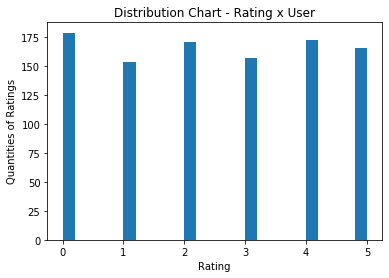

In [106]:
# Distribution Chart - Rating x User
ratings.rating.plot.hist(bins = 25)
plt.title('Distribution Chart - Rating x User')
plt.ylabel('Quantities of Ratings')
plt.xlabel('Rating')

In [107]:
# Pivo Table
matrix = ratings.pivot_table(index = ['wine_id'], columns = ['user_id'], values =  ['rating']).reset_index(drop = True)
matrix.fillna( 0, inplace = True )
matrix.head()

rating                                                             
user_id     1    2         3    4    5         6    7         8     9    10
0          0.0  3.0  2.666667  0.0  4.0  2.000000  0.0  1.000000  0.00  0.0
1          3.5  0.0  4.500000  0.0  0.0  4.000000  1.0  0.000000  2.00  4.0
2          2.5  0.0  1.000000  3.0  5.0  5.000000  4.0  3.000000  1.75  0.0
3          4.0  2.0  0.000000  2.0  0.0  1.333333  5.0  2.333333  0.00  0.0
4          0.0  0.0  0.000000  0.0  3.0  0.000000  5.0  0.000000  2.00  0.0

In [108]:
# Calculate Cosine Similarity
wine_similarity = 1 - pairwise_distances(matrix.as_matrix(), metric = 'cosine')
np.fill_diagonal(wine_similarity, 0)
matrix = pd.DataFrame(wine_similarity)
matrix.head()


c:\users\win\pycharmprojects\livedwine\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.000000,0.393809,0.602873,0.240817,0.319549,0.100291,0.417856,0.388624,0.652733,0.365597,...,0.307037,0.307636,0.512727,0.652739,0.395695,0.232867,0.475760,0.539539,0.515611,0.322230
1,0.393809,0.000000,0.503327,0.389274,0.175129,0.097714,0.624563,0.593019,0.505031,0.667885,...,0.652638,0.187334,0.262267,0.523514,0.629040,0.434863,0.513204,0.329891,0.595397,0.263166
2,0.602873,0.503327,0.000000,0.682066,0.643109,0.471834,0.577847,0.643506,0.622206,0.259510,...,0.572285,0.534706,0.562848,0.861355,0.668208,0.413878,0.822483,0.605233,0.702776,0.529109
3,0.240817,0.389274,0.682066,0.000000,0.540872,0.371193,0.632682,0.665528,0.117848,0.373459,...,0.519694,0.298539,0.333253,0.426843,0.606773,0.777794,0.478564,0.377220,0.487866,0.759724
4,0.319549,0.175129,0.643109,0.540872,0.000000,0.132148,0.000000,0.293687,0.322527,0.152124,...,0.584725,0.304017,0.380021,0.330396,0.559368,0.511394,0.761215,0.261155,0.377441,0.449561


In [117]:
# Recommendation System
try:
    wine_key = input("Digite o de um vinho existente na database: ")    
    wine = wines[wines['name'] == wine_key].index.tolist()
    wine = wine[0]
    
    wines['similarity'] = matrix.iloc[wine]
    wines.columns = ['wine_id', 'name', 'type', 'country', 'region', 'alcohol_content', 'producer', 'service', 'volume', 'vintage', 'similarity']
    wines.head()
except:
    print("Vinho não localizado.")
     
    

In [118]:
print("Vinhos recomendados com base na sua escolha de ", wine_key)
result = pd.DataFrame(wines.sort_values(['similarity'], ascending = False))
result

Vinhos recomendados com base na sua escolha de  Masereto Montepulciano d'Abruzzo 2018


,wine_id,name,type,country,region,alcohol_content,producer,service,volume,vintage,similarity
84,85,Vecchio Podere Cantine Cecconi Chianti DOCG 2017,Tinto,Italia,Toscana,12.0,Cantine Cecconi,17,750,2017.0,0.949826
78,79,La Grupa Red Blend 2019,Tinto,Argentina,Mendoza,12.5,Fecovita,17,750,2019.0,0.760937
15,16,Le Filere Barolo,Tinto,Italia,NaN,14.5,NaN,17,750,NaN,0.760541
83,84,Domaine Bousquet Winemaker's Selection Black R...,Tinto,Argentina,Valle de Uco,14.1,Domaine Bousquet,16,750,2016.0,0.735930
13,14,Anciano Crianza 3 years Tempranillo Valdepeñas...,Tinto,Espanha,Valdepenas,NaN,Anciano,NaN,750,2014.0,0.706769
...,...,...,...,...,...,...,...,...,...,...,...
35,36,Masereto Montepulciano d'Abruzzo 2018,Tinto,Italia,Abruzzo,NaN,Angelo Rocca e Fligi Srl,NaN,750,2018.0,0.000000
4,5,Mil Raices Selección Especial Cabernet Sauvign...,Tinto,Chile,NaN,13.0,Mil Raices,17,750,NaN,0.000000
69,70,Barolo Selezione Cantine by Massimo Rattalino ...,Tinto,Italia,Piemonte,14.0,Massimo Rattalino,17,750,2014.0,0.000000
97,98,Anciano Reserva 7 Years Old Magnum 2011,Tinto,Espanha,Valdepenas,13.0,Anciano,NaN,750,2011.0,NaN
